In [1]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["xtick.labelsize"] = 7

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# .map('{:,.2f}'.format) - - - for big numbers

In [2]:
nyc_crash_df = pd.read_csv('/Users/jakemeissner/Documents/datasets/NYC_Motor_Vehicle_Collisions_to_Person.csv')

In [3]:
nyc_crash_df.head()

,CRASH_DATE,CRASH_TIME,PERSON_INJURY,PERSON_AGE,BODILY_INJURY,SAFETY_EQUIPMENT,PERSON_SEX,PERSON_TYPE,PED_LOCATION,CONTRIBUTING_FACTOR_2,...,COMPLAINT,EMOTIONAL_STATUS,VEHICLE_ID,PERSON_ID,CONTRIBUTING_FACTOR_1,POSITION_IN_VEHICLE,PED_ROLE,UNIQUE_ID,PED_ACTION,COLLISION_ID
0,2021-05-02,21:00,Killed,62.0,Head,NaN,F,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,...,Severe Bleeding,Apparent Death,NaN,f2f329b6-2dfc-4bd0-b751-2e4255f1ea06,Traffic Control Disregarded,NaN,Pedestrian,11791937,Crossing Against Signal,4412948
1,2021-05-21,0:00,Killed,24.0,Entire Body,Air Bag Deployed,M,Occupant,NaN,NaN,...,Internal,Apparent Death,19986231.0,e27e12a2-0485-4e22-b692-3f8a765d2582,NaN,Driver,Driver,11819198,NaN,4419608
2,2021-10-15,2:00,Killed,30.0,Head,None,M,Occupant,NaN,NaN,...,Internal,Apparent Death,20091024.0,1a6f5aa7-5125-4be2-8499-fe7977cb0d90,NaN,Driver,Driver,11998317,NaN,4467504
3,2021-04-17,13:00,Killed,71.0,Head,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Unspecified,...,Internal,Unconscious,NaN,b950706b-00a4-485c-84c5-777208cc3cc9,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Pedestrian,11745791,"Crossing, No Signal, or Crosswalk",4408062
4,2021-05-25,22:00,Killed,69.0,Entire Body,NaN,F,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Unspecified,...,None Visible,Conscious,NaN,6504ea0a-c92d-444c-8127-284943be9aac,Unspecified,NaN,Pedestrian,11991283,"Crossing, No Signal, Marked Crosswalk",4420918


In [4]:
nyc_crash_df.columns

Index(['CRASH_DATE', 'CRASH_TIME', 'PERSON_INJURY', 'PERSON_AGE',
       'BODILY_INJURY', 'SAFETY_EQUIPMENT', 'PERSON_SEX', 'PERSON_TYPE',
       'PED_LOCATION', 'CONTRIBUTING_FACTOR_2', 'EJECTION', 'COMPLAINT',
       'EMOTIONAL_STATUS', 'VEHICLE_ID', 'PERSON_ID', 'CONTRIBUTING_FACTOR_1',
       'POSITION_IN_VEHICLE', 'PED_ROLE', 'UNIQUE_ID', 'PED_ACTION',
       'COLLISION_ID'],
      dtype='object')

In [5]:
nyc_crash_df.iloc[:40]

,CRASH_DATE,CRASH_TIME,PERSON_INJURY,PERSON_AGE,BODILY_INJURY,SAFETY_EQUIPMENT,PERSON_SEX,PERSON_TYPE,PED_LOCATION,CONTRIBUTING_FACTOR_2,...,COMPLAINT,EMOTIONAL_STATUS,VEHICLE_ID,PERSON_ID,CONTRIBUTING_FACTOR_1,POSITION_IN_VEHICLE,PED_ROLE,UNIQUE_ID,PED_ACTION,COLLISION_ID
0,2021-05-02,21:00,Killed,62.0,Head,NaN,F,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,...,Severe Bleeding,Apparent Death,NaN,f2f329b6-2dfc-4bd0-b751-2e4255f1ea06,Traffic Control Disregarded,NaN,Pedestrian,11791937,Crossing Against Signal,4412948
1,2021-05-21,0:00,Killed,24.0,Entire Body,Air Bag Deployed,M,Occupant,NaN,NaN,...,Internal,Apparent Death,19986231.0,e27e12a2-0485-4e22-b692-3f8a765d2582,NaN,Driver,Driver,11819198,NaN,4419608
2,2021-10-15,2:00,Killed,30.0,Head,None,M,Occupant,NaN,NaN,...,Internal,Apparent Death,20091024.0,1a6f5aa7-5125-4be2-8499-fe7977cb0d90,NaN,Driver,Driver,11998317,NaN,4467504
3,2021-04-17,13:00,Killed,71.0,Head,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Unspecified,...,Internal,Unconscious,NaN,b950706b-00a4-485c-84c5-777208cc3cc9,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Pedestrian,11745791,"Crossing, No Signal, or Crosswalk",4408062
4,2021-05-25,22:00,Killed,69.0,Entire Body,NaN,F,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Unspecified,...,None Visible,Conscious,NaN,6504ea0a-c92d-444c-8127-284943be9aac,Unspecified,NaN,Pedestrian,11991283,"Crossing, No Signal, Marked Crosswalk",4420918
5,2021-04-08,23:00,Killed,43.0,Head,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Unspecified,...,Internal,Unconscious,NaN,5d4760cc-99d2-45af-b673-15777906fe18,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Pedestrian,11784113,Other Actions in Roadway,4407069
6,2021-01-14,15:00,Killed,81.0,Entire Body,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,...,Complaint of Pain or Nausea,Apparent Death,NaN,8914628e-0494-4d6d-8d7d-d36abc5a5a73,Alcohol Involvement,NaN,Pedestrian,11589611,"Crossing, No Signal, or Crosswalk",4384065
7,2021-01-20,19:00,Killed,60.0,Chest,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Unspecified,...,Internal,Apparent Death,NaN,2b94e71e-fc46-4648-ab4a-61ef283edbc8,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Pedestrian,11558357,"Crossing, No Signal, or Crosswalk",4385848
8,2021-09-04,14:00,Killed,52.0,Entire Body,Unknown,M,Occupant,NaN,NaN,...,Internal,Unconscious,20083400.0,f1d8ec06-018d-430c-8aef-ebe60e47d2a7,NaN,Driver,Driver,11985005,NaN,4453643
9,2021-05-03,23:00,Killed,21.0,Head,Lap Belt & Harness,M,Occupant,NaN,NaN,...,Internal,Unconscious,19993860.0,64974d87-d02f-42b1-a60b-58248a3e38de,NaN,Driver,Driver,11832119,NaN,4413273


In [6]:
nyc_crash_df.value_counts('PERSON_SEX')

PERSON_SEX
M    27573
F    18012
U       84
dtype: int64

<AxesSubplot:xlabel='PERSON_SEX'>

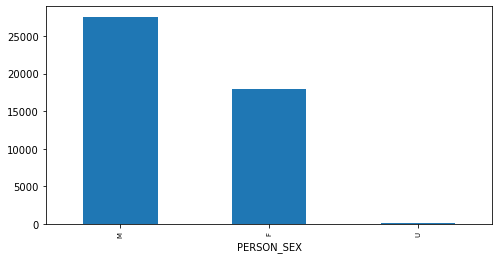

In [7]:
nyc_crash_df.value_counts('PERSON_SEX').plot(kind='bar')

In [8]:
nyc_crash_df = nyc_crash_df.sort_values('PERSON_AGE')[57:]

In [9]:
nyc_crash_df = nyc_crash_df.sort_values('PERSON_AGE', ascending=False)[19:]

<AxesSubplot:ylabel='Frequency'>

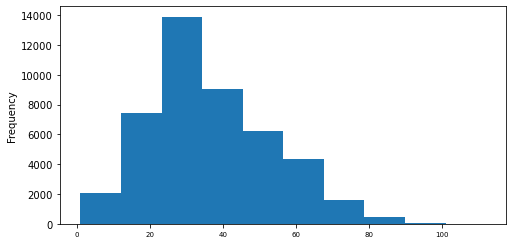

In [10]:
nyc_crash_df['PERSON_AGE'].plot(kind='hist')

In [11]:
nyc_crash_df.columns

Index(['CRASH_DATE', 'CRASH_TIME', 'PERSON_INJURY', 'PERSON_AGE',
       'BODILY_INJURY', 'SAFETY_EQUIPMENT', 'PERSON_SEX', 'PERSON_TYPE',
       'PED_LOCATION', 'CONTRIBUTING_FACTOR_2', 'EJECTION', 'COMPLAINT',
       'EMOTIONAL_STATUS', 'VEHICLE_ID', 'PERSON_ID', 'CONTRIBUTING_FACTOR_1',
       'POSITION_IN_VEHICLE', 'PED_ROLE', 'UNIQUE_ID', 'PED_ACTION',
       'COLLISION_ID'],
      dtype='object')

In [12]:
nyc_crash_df.groupby('PERSON_SEX')['PERSON_AGE'].mean().round(2)

PERSON_SEX
F    37.33
M    36.47
U    36.94
Name: PERSON_AGE, dtype: float64

<AxesSubplot:xlabel='PERSON_SEX'>

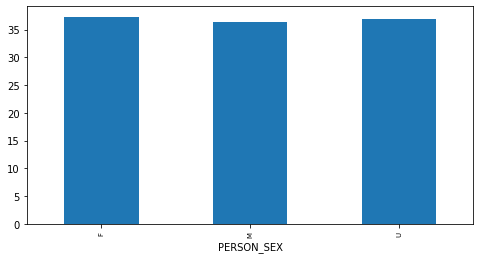

In [13]:
nyc_crash_df.groupby('PERSON_SEX')['PERSON_AGE'].mean().round(2).plot(kind='bar')

In [14]:
nyc_crash_df.groupby('PERSON_INJURY')['PERSON_AGE'].mean().round(2)

PERSON_INJURY
Injured    36.76
Killed     46.01
Name: PERSON_AGE, dtype: float64

<AxesSubplot:xlabel='PERSON_INJURY'>

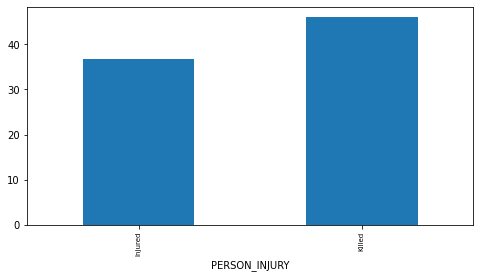

In [15]:
nyc_crash_df.groupby('PERSON_INJURY')['PERSON_AGE'].mean().round(2).plot(kind='bar')

In [16]:
nyc_crash_df['PERSON_INJURY'].unique()

array(['Injured', 'Killed'], dtype=object)

<BarContainer object of 2 artists>

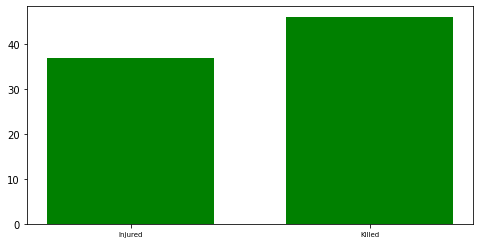

In [17]:
plt.bar(nyc_crash_df['PERSON_INJURY'].unique(), nyc_crash_df.groupby('PERSON_INJURY')['PERSON_AGE'].mean(), width=0.70, color='g')

In [18]:
nyc_crash_df.columns

Index(['CRASH_DATE', 'CRASH_TIME', 'PERSON_INJURY', 'PERSON_AGE',
       'BODILY_INJURY', 'SAFETY_EQUIPMENT', 'PERSON_SEX', 'PERSON_TYPE',
       'PED_LOCATION', 'CONTRIBUTING_FACTOR_2', 'EJECTION', 'COMPLAINT',
       'EMOTIONAL_STATUS', 'VEHICLE_ID', 'PERSON_ID', 'CONTRIBUTING_FACTOR_1',
       'POSITION_IN_VEHICLE', 'PED_ROLE', 'UNIQUE_ID', 'PED_ACTION',
       'COLLISION_ID'],
      dtype='object')

In [19]:
for x in nyc_crash_df['POSITION_IN_VEHICLE'].unique():
    print(x)

Left rear passenger, or rear passenger on a bicycle, motorcycle, snowmobile
Front passenger, if two or more persons, including the driver, are in the front seat
Unknown
Driver
nan
Middle rear seat, or passenger lying across a seat
Right rear passenger or motorcycle sidecar passenger
Middle front seat, or passenger lying across a seat
Any person in the rear of a station wagon, pick-up truck, all passengers on a bus, etc
Riding/Hanging on Outside
If one person is seated on another person&apos;s lap


In [20]:
nyc_crash_df['POSITION_IN_VEHICLE'].value_counts()

Driver                                                                                    26021
Front passenger, if two or more persons, including the driver, are in the front seat       5391
Right rear passenger or motorcycle sidecar passenger                                       2793
Left rear passenger, or rear passenger on a bicycle, motorcycle, snowmobile                2485
Middle rear seat, or passenger lying across a seat                                          653
Unknown                                                                                     618
Riding/Hanging on Outside                                                                   526
Middle front seat, or passenger lying across a seat                                         437
Any person in the rear of a station wagon, pick-up truck, all passengers on a bus, etc      427
If one person is seated on another person&apos;s lap                                         25
Name: POSITION_IN_VEHICLE, dtype: int64

In [21]:
nyc_crash_df.columns

Index(['CRASH_DATE', 'CRASH_TIME', 'PERSON_INJURY', 'PERSON_AGE',
       'BODILY_INJURY', 'SAFETY_EQUIPMENT', 'PERSON_SEX', 'PERSON_TYPE',
       'PED_LOCATION', 'CONTRIBUTING_FACTOR_2', 'EJECTION', 'COMPLAINT',
       'EMOTIONAL_STATUS', 'VEHICLE_ID', 'PERSON_ID', 'CONTRIBUTING_FACTOR_1',
       'POSITION_IN_VEHICLE', 'PED_ROLE', 'UNIQUE_ID', 'PED_ACTION',
       'COLLISION_ID'],
      dtype='object')

In [22]:
nyc_crash_df['EMOTIONAL_STATUS'].unique()

array(['Conscious', 'Unknown', 'Does Not Apply', 'Semiconscious',
       'Apparent Death', 'Unconscious', 'Shock', 'Incoherent'],
      dtype=object)

In [23]:
nyc_crash_df['EMOTIONAL_STATUS'].value_counts()

Conscious         42120
Shock              1243
Unknown            1175
Unconscious         305
Semiconscious       296
Incoherent          184
Apparent Death      167
Does Not Apply      103
Name: EMOTIONAL_STATUS, dtype: int64

In [24]:
nyc_crash_df.groupby('EMOTIONAL_STATUS')['PERSON_AGE'].mean().round(0)

EMOTIONAL_STATUS
Apparent Death    44.0
Conscious         37.0
Does Not Apply    39.0
Incoherent        41.0
Semiconscious     39.0
Shock             38.0
Unconscious       39.0
Unknown           36.0
Name: PERSON_AGE, dtype: float64

<AxesSubplot:xlabel='EMOTIONAL_STATUS'>

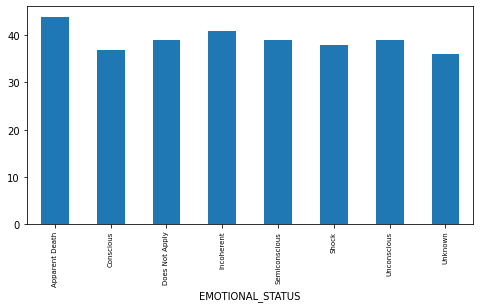

In [25]:
nyc_crash_df.groupby('EMOTIONAL_STATUS')['PERSON_AGE'].mean().round(0).plot(kind='bar')

In [26]:
nyc_crash_df['COMPLAINT'].value_counts()

Complaint of Pain or Nausea           27918
None Visible                           4864
Minor Bleeding                         2714
Contusion - Bruise                     2250
Whiplash                               1902
Unknown                                1696
Abrasion                               1674
Fracture - Distorted - Dislocation      883
Internal                                630
Concussion                              332
Severe Bleeding                         199
Severe Lacerations                      184
Crush Injuries                          182
Minor Burn                              120
Moderate Burn                            26
Amputation                                8
Severe Burn                               7
Paralysis                                 3
Does Not Apply                            1
Name: COMPLAINT, dtype: int64

<AxesSubplot:ylabel='PERSON_AGE'>

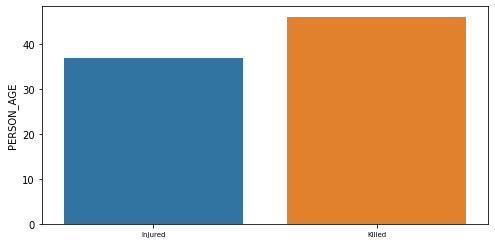

In [27]:
sns.barplot(x=nyc_crash_df['PERSON_INJURY'].unique(), y=nyc_crash_df.groupby('PERSON_INJURY')['PERSON_AGE'].mean())

<AxesSubplot:ylabel='PERSON_AGE'>

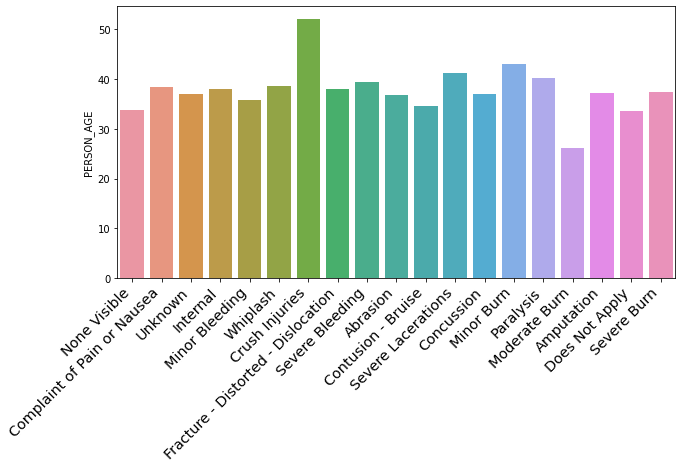

In [28]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x=nyc_crash_df['COMPLAINT'].unique(),data=nyc_crash_df)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

sns.barplot(x=nyc_crash_df['COMPLAINT'].unique(), y=nyc_crash_df.groupby('COMPLAINT')['PERSON_AGE'].mean(), data=nyc_crash_df)

<AxesSubplot:ylabel='PERSON_AGE'>

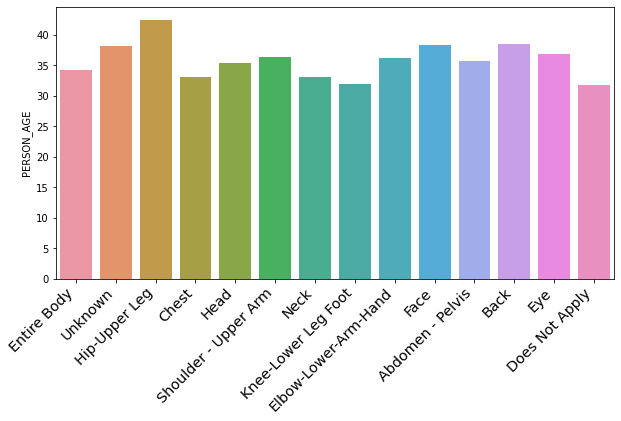

In [29]:
plt.figure(figsize=(10,5))
#chart = sns.countplot(x=nyc_crash_df['COMPLAINT'].unique(),data=nyc_crash_df)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

sns.barplot(x=nyc_crash_df['BODILY_INJURY'].unique(), y=nyc_crash_df.groupby('BODILY_INJURY')['PERSON_AGE'].mean(), data=nyc_crash_df)

In [30]:
nyc_crash_df.columns

Index(['CRASH_DATE', 'CRASH_TIME', 'PERSON_INJURY', 'PERSON_AGE',
       'BODILY_INJURY', 'SAFETY_EQUIPMENT', 'PERSON_SEX', 'PERSON_TYPE',
       'PED_LOCATION', 'CONTRIBUTING_FACTOR_2', 'EJECTION', 'COMPLAINT',
       'EMOTIONAL_STATUS', 'VEHICLE_ID', 'PERSON_ID', 'CONTRIBUTING_FACTOR_1',
       'POSITION_IN_VEHICLE', 'PED_ROLE', 'UNIQUE_ID', 'PED_ACTION',
       'COLLISION_ID'],
      dtype='object')

<AxesSubplot:xlabel='PERSON_AGE', ylabel='Count'>

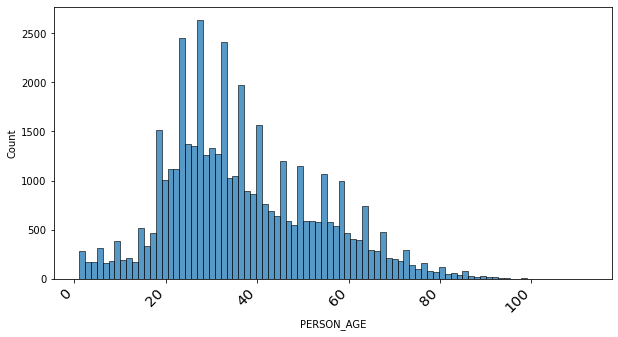

In [31]:
plt.figure(figsize=(10,5))
#chart = sns.countplot(x=nyc_crash_df['COMPLAINT'].unique(),data=nyc_crash_df)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

sns.histplot(x=nyc_crash_df['PERSON_AGE'], data=nyc_crash_df)

In [32]:
nyc_crash_df.columns

Index(['CRASH_DATE', 'CRASH_TIME', 'PERSON_INJURY', 'PERSON_AGE',
       'BODILY_INJURY', 'SAFETY_EQUIPMENT', 'PERSON_SEX', 'PERSON_TYPE',
       'PED_LOCATION', 'CONTRIBUTING_FACTOR_2', 'EJECTION', 'COMPLAINT',
       'EMOTIONAL_STATUS', 'VEHICLE_ID', 'PERSON_ID', 'CONTRIBUTING_FACTOR_1',
       'POSITION_IN_VEHICLE', 'PED_ROLE', 'UNIQUE_ID', 'PED_ACTION',
       'COLLISION_ID'],
      dtype='object')

In [33]:
nyc_crash_df['PED_ACTION'].unique()

array([nan, 'Not in Roadway', 'Crossing, No Signal, or Crosswalk',
       'Emerging from in Front of/Behind Parked Vehicle',
       'Crossing With Signal', 'Crossing, No Signal, Marked Crosswalk',
       'Does Not Apply', 'Unknown', 'Crossing Against Signal',
       'Other Actions in Roadway',
       'Getting On/Off Vehicle Other Than School Bus',
       'Riding/Walking Along Highway With Traffic',
       'Riding/Walking Along Highway Against Traffic',
       'Working in Roadway', 'Pushing/Working on Car',
       'Playing in Roadway', 'Going to/From Stopped School Bus'],
      dtype=object)

In [34]:
nyc_crash_df['PED_ACTION'].value_counts()

Crossing With Signal                               2479
Crossing, No Signal, or Crosswalk                  1162
Crossing, No Signal, Marked Crosswalk               528
Other Actions in Roadway                            514
Crossing Against Signal                             400
Not in Roadway                                      382
Unknown                                             270
Does Not Apply                                      269
Emerging from in Front of/Behind Parked Vehicle     212
Getting On/Off Vehicle Other Than School Bus        107
Working in Roadway                                   96
Riding/Walking Along Highway With Traffic            71
Playing in Roadway                                   30
Riding/Walking Along Highway Against Traffic         21
Pushing/Working on Car                               20
Going to/From Stopped School Bus                      6
Name: PED_ACTION, dtype: int64

In [35]:
ped_illegal_cross = nyc_crash_df[nyc_crash_df['PED_ACTION'] == 'Crossing Against Signal']
ped_illegal_cross

,CRASH_DATE,CRASH_TIME,PERSON_INJURY,PERSON_AGE,BODILY_INJURY,SAFETY_EQUIPMENT,PERSON_SEX,PERSON_TYPE,PED_LOCATION,CONTRIBUTING_FACTOR_2,...,COMPLAINT,EMOTIONAL_STATUS,VEHICLE_ID,PERSON_ID,CONTRIBUTING_FACTOR_1,POSITION_IN_VEHICLE,PED_ROLE,UNIQUE_ID,PED_ACTION,COLLISION_ID
35004,2021-06-19,21:00,Injured,87.0,Chest,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Failure to Yield Right-of-Way,...,Complaint of Pain or Nausea,Conscious,NaN,14cee6bd-ba48-479c-aee6-5ef3a967c913,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Pedestrian,11789865,Crossing Against Signal,4428784
40904,2021-05-07,11:00,Injured,87.0,Head,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,...,Minor Bleeding,Conscious,NaN,4bbd4ea4-26d6-471e-970b-964bc20fdf8e,View Obstructed/Limited,NaN,Pedestrian,11793260,Crossing Against Signal,4414205
3386,2021-09-01,18:00,Injured,85.0,Head,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Unspecified,...,Minor Bleeding,Conscious,NaN,5c49621e-1db5-4c93-8802-43495c6edd40,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Pedestrian,11932999,Crossing Against Signal,4453312
45647,2021-05-17,9:00,Injured,85.0,Back,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Traffic Control Disregarded,...,Complaint of Pain or Nausea,Conscious,NaN,36a09471-1bc6-495d-be55-a665f1063cea,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Pedestrian,11750595,Crossing Against Signal,4417390
224,2021-01-29,5:00,Killed,84.0,Knee-Lower Leg Foot,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Unspecified,...,None Visible,Apparent Death,NaN,48e3877b-9447-47de-95b9-64c125850aa2,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Pedestrian,11587693,Crossing Against Signal,4387714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29219,2021-01-14,0:00,Injured,NaN,Entire Body,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Unspecified,...,None Visible,Conscious,NaN,b9c7969c-c5aa-4ade-9679-a03fabe1257a,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Pedestrian,11558002,Crossing Against Signal,4385793
32228,2021-03-04,17:00,Injured,NaN,Hip-Upper Leg,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Unspecified,...,Complaint of Pain or Nausea,Conscious,NaN,d627b5a1-d140-41a4-8a9c-0d3e46713fe2,Failure to Yield Right-of-Way,NaN,Pedestrian,11599507,Crossing Against Signal,4396812
34294,2021-06-07,18:00,Injured,NaN,Face,NaN,F,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Unspecified,...,Minor Bleeding,Conscious,NaN,c8959aba-a877-48c5-9c92-f77d65546ab1,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Pedestrian,11748660,Crossing Against Signal,4424829
41969,2021-05-14,1:00,Injured,NaN,Face,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Unspecified,...,Minor Bleeding,Unconscious,NaN,af78ab90-2d15-41c3-95e0-4f5e2c30bdc4,Traffic Control Disregarded,NaN,Pedestrian,11759993,Crossing Against Signal,4419410


In [36]:
round(ped_illegal_cross['PERSON_AGE'].mean())

39

In [37]:
round(nyc_crash_df['PERSON_AGE'].mean())

37

In [38]:
ped_illegal_cross['PERSON_SEX'].value_counts()

M    244
F    156
Name: PERSON_SEX, dtype: int64

In [39]:
nyc_crash_df['PERSON_SEX'].value_counts()

M    27536
F    17982
U       75
Name: PERSON_SEX, dtype: int64

<AxesSubplot:ylabel='PERSON_SEX'>

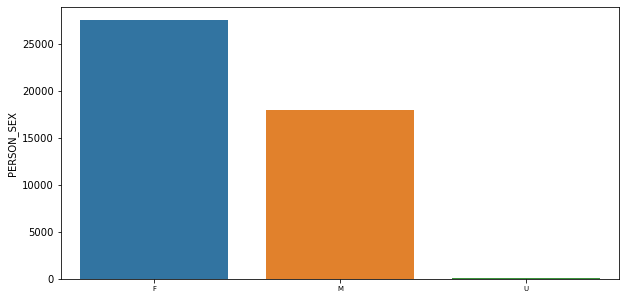

In [47]:
plt.figure(figsize=(10,5))

sns.barplot(x=nyc_crash_df['PERSON_SEX'].unique(), y=nyc_crash_df['PERSON_SEX'].value_counts(), data=nyc_crash_df)

In [41]:
nyc_crash_df.columns

Index(['CRASH_DATE', 'CRASH_TIME', 'PERSON_INJURY', 'PERSON_AGE',
       'BODILY_INJURY', 'SAFETY_EQUIPMENT', 'PERSON_SEX', 'PERSON_TYPE',
       'PED_LOCATION', 'CONTRIBUTING_FACTOR_2', 'EJECTION', 'COMPLAINT',
       'EMOTIONAL_STATUS', 'VEHICLE_ID', 'PERSON_ID', 'CONTRIBUTING_FACTOR_1',
       'POSITION_IN_VEHICLE', 'PED_ROLE', 'UNIQUE_ID', 'PED_ACTION',
       'COLLISION_ID'],
      dtype='object')